In [45]:
from PIL import Image
from astropy.table import Table
from astropy.io import ascii
import csv
import pandas
from astropy.table import Column
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
import os
import shutil
from astropy.table import QTable
import matplotlib.colors
from matplotlib.mlab import bivariate_normal

In [2]:
image_file = fits.open('asFlux-a-23800020.fits')
hdr = image_file[0].header
x = hdr['NAME']
image_file.close()
print(x)

9721-57942-01


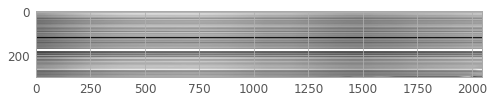

In [49]:
data = fits.getdata('asFlux-a-23800020.fits', 0)
fig=plt.figure()
plt.imshow(data, cmap='gray');
fig.savefig('flatfield.jpg')
#plt.colorbar()

In [33]:
data = fits.getdata('asFlux-a-23800020.fits', 0)
t = Table(data)
df = t.to_pandas()
df.index = df.index + 1
w = df.std(1)
e = w*100
np.any(e >= 30)

False

In [84]:
def main():
    s = 'C:/Users/farre/Documents/dome flats south'
    file_list = os.listdir(s)
    for f in file_list:
        if f.endswith('.fits'):
            b = f
        
            image_file = fits.open(b)
            hdr = image_file[0].header
            x = hdr['NAME']
            image_file.close()    
            
            data = fits.getdata(b, 0)
            t = Table(data)
            df = t.to_pandas()
            df.index = df.index + 1
            df['Sum'] = df.sum(1)/2048
            

    df['Sum'].to_csv(x + ".csv", sep=' ', header = None)


if __name__ == "__main__":
    main()

In [38]:
s = '//home/emily/Documents/dome flats south/21'
file_list = os.listdir(s)
for f in file_list:
    if f.endswith('.fits'):
        b = f
        
        image_file = fits.open(b)
        hdr = image_file[0].header
        x = hdr['NAME']
        image_file.close()    
            
        data = fits.getdata(b, 0)
        t = Table(data)
        df = t.to_pandas()
        df.index = df.index + 1
        w = df.std(1)
        e = w*100
        
        
if np.any(e >= 30):
    print(x,e)
        


In [45]:
def main():
    s = 'C:/Users/farre/Documents/dome flats south/21'
    file_list = os.listdir(s)
    for f in file_list:
        if f.endswith('.csv'):
            b = f
            file_path = b
            file_name = file_path.split("/")
            arr = []
            with open(file_path) as f:
            #print('in with loop') 
                for line in f: 
                    if '.' in line:
                    #print(line.split())
                        a = line.split()
                        a.insert(0,file_name)
                        arr.append(a)

	#for p in arr: print(p)
	#print(arr)

            wtr = csv.writer(open ("omg.csv", 'a'), delimiter=',', lineterminator='\n')
            for x in arr : wtr.writerow (x)

if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/farre/Documents/dome flats south/21'

In [55]:
def main(): 

    throughput = '//home/emily/Documents/dome flats south/21/throughput.csv'
    mapdatatest = '//home/emily/Documents/dome flats south/21/extracted_data_final.csv'
    outputfile = "output"

    with open(throughput, 'r') as master:
        wtr = csv.writer(open ("throughput_merged_data_21.csv", 'a'), delimiter=',', lineterminator='\n')
        reader = csv.reader(master)
        for row in reader: 
            with open(mapdatatest, 'r') as data: 
                datafile = csv.reader(data)
                for rows in datafile:
                    if rows[0] in row and rows[5] in row:
                        for item in rows:
                            if item not in row: row.append(item)  
                    
                        wtr.writerow(row)
						# rows.extend(row)
						# print(unique_justseen(rows))

if __name__ == "__main__":
    main()


KeyboardInterrupt: 